<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 4 - PCA

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# AGENDA





*   PCA using sklearn on toy dataset
*   PCA for noise reduction
*   PCA on Faces Dataset


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Excercise 1: PCA from scratch / sklearn


Implement PCA algorithm from scratch




In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print(a)
print('\n',b)
print('\n',np.concatenate((a, b), axis=0))
print('\n',np.concatenate((a, b.T), axis=1))

[[1 2]
 [3 4]]

 [[5 6]]

 [[1 2]
 [3 4]
 [5 6]]

 [[1 2 5]
 [3 4 6]]


In [ ]:
np.random.seed(42)

def generate_data():
  X_0, y_0 = np.random.randint(20, 65, size=(10, 4)), np.zeros(10)
  X_1, y_1 = np.random.randint(50, 90, size=(10, 4)), np.ones(10)
  X = np.concatenate((X_0, X_1), axis=0)
  y = np.concatenate((y_0, y_1), axis=0)
  return X, y

In [ ]:
X, y = generate_data()
print('Shape of X', X.shape)
print('Shape of y', y.shape)

Shape of X (20, 4)
Shape of y (20,)


**Normalize before PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X) #  .fit(X) :Tra ve mean va do lech chuan (std)
X = scaler.transform(X)

**PCA using sklearn**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components : so chieu du lieu 

# pca = PCA(n_components=2).fit(X)
# X_pca = pca.transform(X)
X_pca = pca.fit_transform(X) # Chuan hoa du lieu (X-mean)/std
print('Information retained')
print(pca.explained_variance_ratio_) # Luong thong tin du lai sau khi giam

Information retained
[0.61573912 0.17584669]


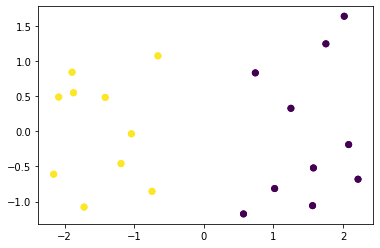

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

# Excercise 2: PCA for noise reduction

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print('Shape of digits data:',digits.data.shape)

Shape of digits data: (1797, 64)


64 mean each image is 8x8

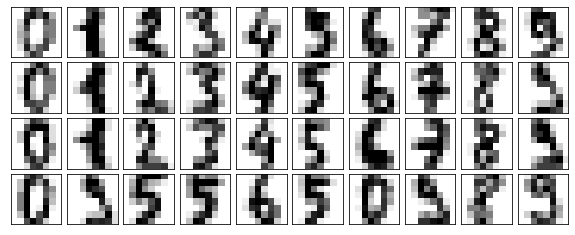

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Add noise to data

In [ ]:
noisy = np.random.normal(digits.data, 4)
print(noisy)
digits.data.shape

[[ 3.47565588 -3.94510632  7.87577396 ... -6.12360041 -0.49195976
   1.98988021]
 [ 4.9089556  -5.86314495  4.23466552 ... 15.2318662   4.92234946
   2.51447021]
 [-1.54567702 -4.45628002  0.88130586 ... 15.84569283  9.25423881
  -2.38396775]
 ...
 [-6.32483775 -2.91513636 -2.5313624  ...  6.72670332 -2.66560162
   6.33578162]
 [ 1.45376808  4.71849327  1.83258287 ... 15.02250043  8.0484084
  -0.05736675]
 [ 1.18775473  5.16444672  2.05355314 ...  2.33724153  2.75355553
  -0.50882002]]


(1797, 64)

Apply PCA to reduce noise

In [ ]:
# TODO
#1. Apply PCA on noisy data
#2. Reconstruct to new data, name it "projected"
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(noisy)
noisy_scaled = scaler.transform(noisy)


pca= PCA(n_components= 0.45) #n_components :
components = pca.fit_transform(noisy_scaled)
# print(sum(pca.explained_variance_ratio_))
print(pca.n_components_)

15


Plot reconstructed image

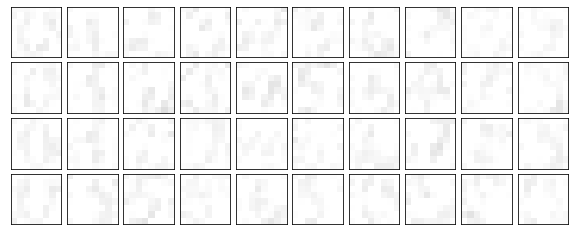

In [ ]:
projected = pca.inverse_transform(components) # tai tao lai data ban dau
projected = scaler.inverse_transform(projected)
plot_digits(projected)

# Excercise 3: EigenFaces

**DATASET** https://drive.google.com/drive/folders/1SAWuDH0QLyxeKxQgHMJG-pqtqHJxe5J2?usp=sharing

In [ ]:
import os, glob, sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_paths = glob.glob("/content/drive/My Drive/Colab Notebooks/faces/*.pgm")
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]


1 subject01 centerlight


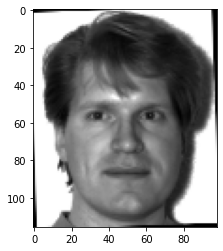

1 subject01 glasses


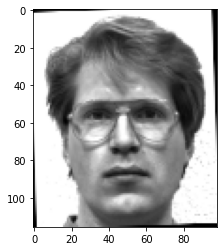

1 subject01 happy


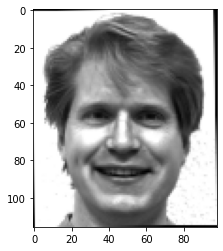

1 subject01 leftlight


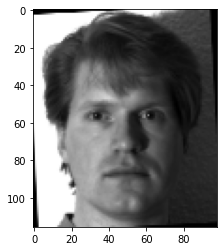

1 subject01 noglasses


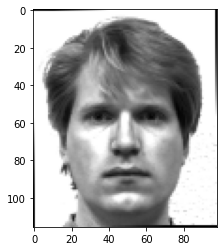

1 subject01 normal


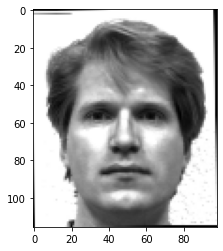

1 subject01 rightlight


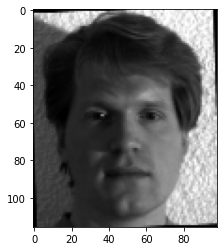

1 subject01 sad


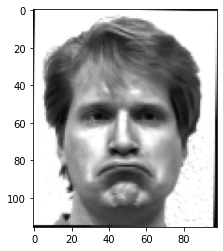

1 subject01 sleepy


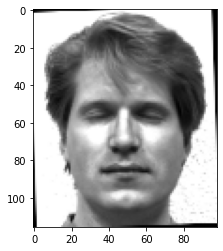

1 subject01 surprised


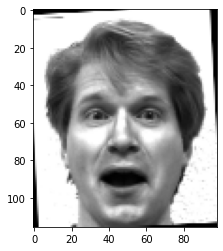

In [ ]:
def parse_image_path(path):
    """Get subject information from image path
    Arguments:
        `path`: str
            Path to the image
    Returns:
        `id`: str
            ID of the subject
        `subject`: str
            Subject name
        `attribute`: str
            Attribute of the subject
    """
    basename = os.path.basename(path)
    basename = os.path.splitext(basename)[0]
    subject, attribute = basename.split(".")
    id = int(subject[-2:])
    return id, subject, attribute


# get all images with path of the form "faces/*.pgm" (regular expression)
image_paths.sort()

n_samples = 10
for path in image_paths[:n_samples]:
    # parse image path
    id, subject, attribute = parse_image_path(path)
    
    # read image from path
    image = cv2.imread(path)
    
    # display
    print(id, subject, attribute)
    plt.imshow(image, cmap="gray")
    plt.show()

X = []
metadata = {"id": [], "subject": [], "attribute": []}
for path in image_paths:
    # parse image information
    id, subject, attribute = parse_image_path(path)
    metadata["id"].append(id)
    metadata["subject"].append(subject)
    metadata["attribute"].append(attribute)

    # read image
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

    # add to x_train
    X.append(image[None, ...]) # [None, ...] ~ [H, W, C] --> [1, H, W, C]
X = np.concatenate(X, axis=0) # [1, H, W, C] --> [N, H, W, C]
y = metadata['attribute']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preprocess_data(X, labels):
  X = X.astype(np.float32)
  X = X / 255
  label_enc = LabelEncoder()
  ohe = OneHotEncoder()
  temp = label_enc.fit_transform(labels)
  Y = ohe.fit_transform(temp.reshape(-1,1)).toarray()
  return X,y,Y

X,y,Y = preprocess_data(X, y)
print(X.shape)
print(Y.shape)


(165, 116, 98)
(165, 11)


Remember to flatten data using np.reshape

In [ ]:
# TODO
# 1. Use np.reshape to flat out data, name it "X_flat"
X_flat = np.reshape(X, (165,116*98))
print(X_flat.shape)

(165, 11368)


Normalize data

In [ ]:
# TODO
# 1. Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_flat)
X_flat_scaled =  scaler.transform(X_flat)

Implement PCA using sklearn

In [ ]:
from sklearn.decomposition import PCA

pca_face = PCA(100)
pca_face.fit(X_flat_scaled)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

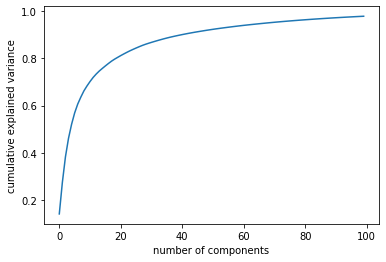

In [ ]:
plt.plot(np.cumsum(pca_face.explained_variance_ratio_)) # cong don gia tri
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca_face.components_.shape

(100, 11368)

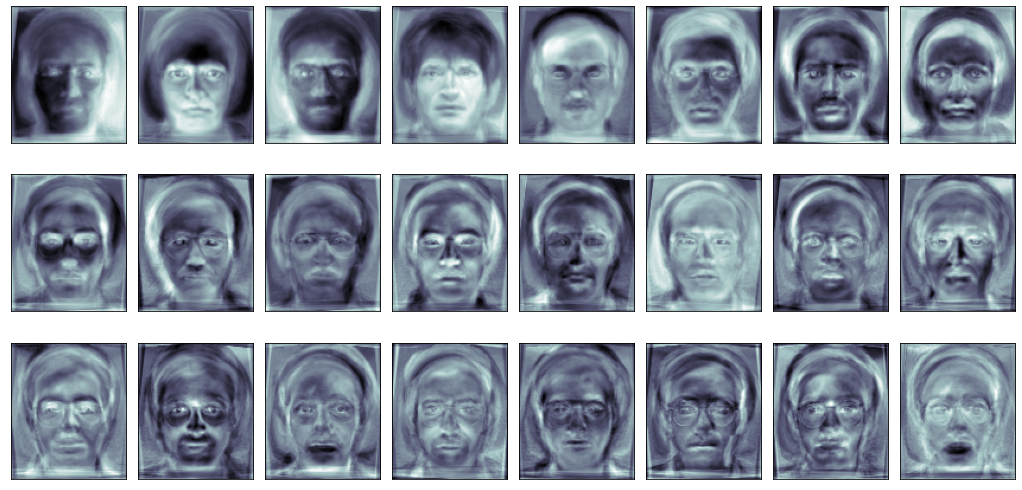

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(18, 9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_face.components_[i].reshape(116, 98), cmap='bone')


In [ ]:
# pca = PCA(n_components=70)
# components = pca.fit_transform(noisy_scaled)
components = pca_face.transform(X_flat_scaled)
projected = pca_face.inverse_transform(components) # tai tao lai data ban dau
projected = scaler.inverse_transform(projected)

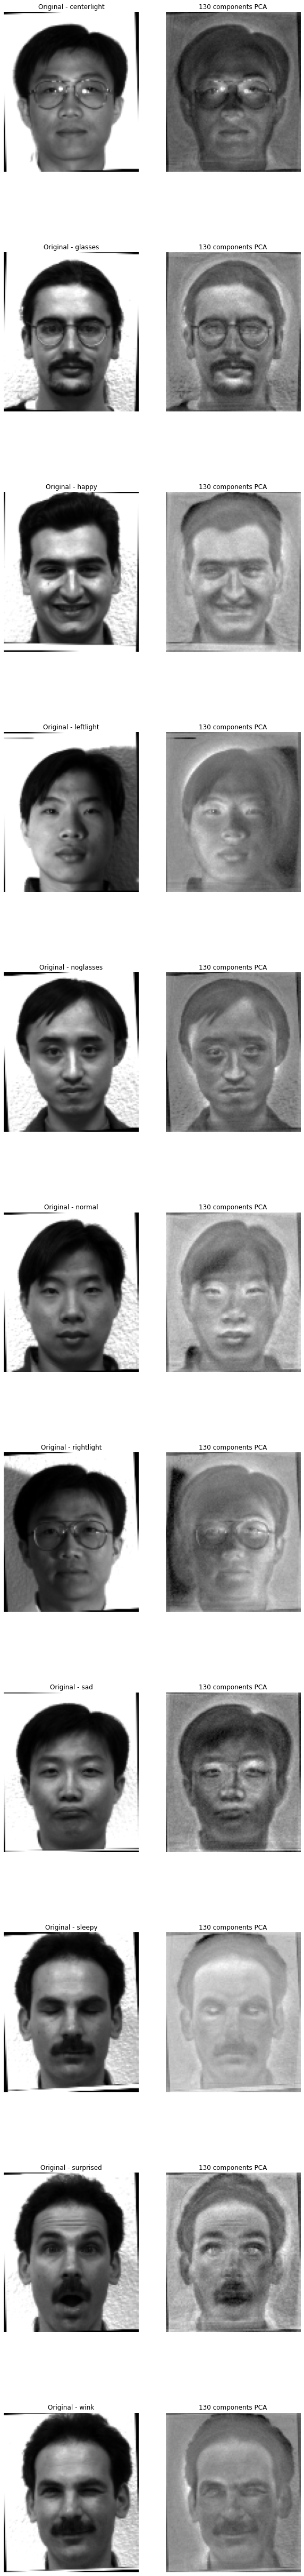

In [ ]:
fig, axs = plt.subplots(11,2)
fig.set_figheight(90)
fig.set_figwidth(10)
for i in range(11):
  target = np.random.choice(np.where(np.argmax(Y, axis=1) == i)[0])
  axs[i][0].grid('off')
  axs[i][0].axis('off')
  axs[i][1].grid('off')
  axs[i][1].axis('off')
  axs[i][0].set_title('Original - '+states[i])
  axs[i][1].set_title('130 components PCA')
  axs[i][0].imshow(X[target], cmap='gray')
  axs[i][1].imshow(projected[target].reshape(116,98), cmap='gray')
  
